In [3]:
import numpy as np
from stl import mesh
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from scipy import interpolate
from skimage.transform import resize
import math
import pyvista as pv

from python import model_control

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
points = np.load("temp/points.npy")
input = np.zeros((2,256,384))

In [7]:
x_max, x_min = np.max(points[:,0]), np.min(points[:,0])
y_max, y_min = np.max(points[:,1]), np.min(points[:,1])
z_max, z_min = np.max(points[:,2]), np.min(points[:,2])

In [93]:
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 376), np.linspace(y_max, y_min, 236))

In [94]:
interpolatedImage = griddata(points[:, 0:2], 208/(z_max-z_min)*(points[:, 2]-z_min), (x_grid, y_grid), method='linear', fill_value=0)

In [95]:
input[0,:236,:376] = interpolatedImage

In [101]:
x_grid, y_grid = np.meshgrid(np.linspace(x_min+(x_max-x_min)*0.6583, x_min+(x_max-x_min)*0.9083, 384), np.linspace(y_min+(y_max-y_min)*0.425, y_min+(y_max-y_min)*0.175, 256))

In [102]:
interpolatedImage = griddata(points[:, 0:2], 208/(z_max-z_min)*(points[:, 2]-z_min), (x_grid, y_grid), method='linear', fill_value=0)

In [103]:
input[1,:,:] = interpolatedImage

In [9]:
input = np.load("temp/input.npy")

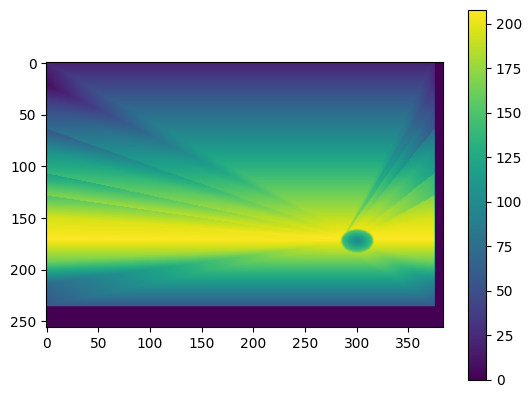

In [12]:
plt.imshow(input[0,:,:])
plt.colorbar()

In [ ]:
plt.imshow(input[:,:,1])
plt.colorbar()

In [2]:
model_control.select_process_material("Car Door Panel Stamping", "Aluminium Alloy 5754")
model_control.select_model_type("Thinning")

model directory is  /Users/alexlee/OneDrive - Imperial College London/Year 4/Masters/code/3d_viewer/python/Car Door Panel Stamping/Aluminium Alloy 5754
Thinning model loaded


<Figure size 640x480 with 0 Axes>

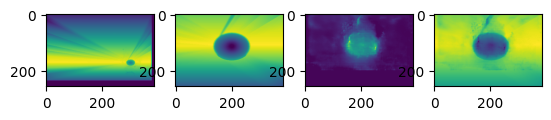

In [10]:
# x_zoom_start, x_zoom_end = 0.6583, 0.9083
# y_zoom_start, y_zoom_end = 0.425, 0.175

x_zoom_start = 0.67
x_zoom_end = x_zoom_start + (0.9083-0.6583)
y_zoom_start = 0.38
y_zoom_end = y_zoom_start + (0.175-0.425)

input = np.load("temp/input.npy")
points = np.load("temp/points.npy")
x_max, x_min = np.max(points[:,0]), np.min(points[:,0])
y_max, y_min = np.max(points[:,1]), np.min(points[:,1])
z_max, z_min = np.max(points[:,2]), np.min(points[:,2])
x_grid, y_grid = np.meshgrid(np.linspace(x_min+(x_max-x_min)*x_zoom_start, x_min+(x_max-x_min)*x_zoom_end, 384), np.linspace(y_min+(y_max-y_min)*y_zoom_start, y_min+(y_max-y_min)*y_zoom_end, 256))
interpolatedImage = griddata(points[:, 0:2], 208/(z_max-z_min)*(points[:, 2]-z_min), (x_grid, y_grid), method='linear', fill_value=0)
input[1,:,:] = input[3,:,:] = interpolatedImage
output = model_control.predict(input)

clip = 200
output_zoom = np.zeros((256,384))
output_zoom[:clip,:] = output[1,(256-clip):,:]

plt.figure()
f, ax = plt.subplots(1,4)

ax[0].imshow(np.multiply(input[0],1-output[0]))
ax[1].imshow(input[1])
ax[2].imshow(output_zoom)
ax[3].imshow(np.multiply(input[1],1-output_zoom))

(59, 94)
(59, 94)


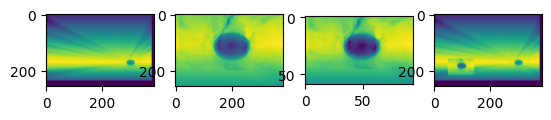

In [13]:
f, ax = plt.subplots(1,4)

x_edge = 376
y_edge = 236

thinning = thinning2 = np.multiply(input[0],1-output[0])
thinning_zoom = np.multiply(input[1],1-output_zoom)
ax[0].imshow(thinning)
ax[1].imshow(thinning_zoom)

x1, x2 = round(y_edge*x_zoom_start), round(y_edge*x_zoom_end) # 158, 217
y1, y2 = round(x_edge*y_zoom_start), round(x_edge*y_zoom_end) # 143, 49
print(thinning2[x1:x2, y2:y1].shape)

# interp = interpolate.interp2d(np.arange(384), np.arange(256), thinning_zoom,)

# thinning_zoom_2 = interp(np.arange(y1-y2), np.arange(x2-x1))
# thinning_zoom_2 = interp(np.arange(300), np.arange(200))

thinning_zoom_2 = resize(thinning_zoom, (x2-x1,y1-y2), order=1)
print(thinning_zoom_2.shape)
ax[2].imshow(thinning_zoom_2)

thinning2[x1:x2, y2:y1] = thinning_zoom_2
ax[3].imshow(thinning2)



2023-02-19 23:38:30.733 (  37.470s) [           AB2CE]            vtkMath.cxx:590   WARN| Unable to factor linear system
2023-02-19 23:40:13.657 ( 140.392s) [           AB2CE]            vtkMath.cxx:590   WARN| Unable to factor linear system
2023-02-19 23:40:13.658 ( 140.393s) [           AB2CE]            vtkMath.cxx:590   WARN| Unable to factor linear system
2023-02-19 23:40:13.998 ( 140.732s) [           AB2CE]            vtkMath.cxx:590   WARN| Unable to factor linear system
2023-02-19 23:40:13.998 ( 140.733s) [           AB2CE]            vtkMath.cxx:590   WARN| Unable to factor linear system
2023-02-19 23:40:14.328 ( 141.063s) [           AB2CE]            vtkMath.cxx:590   WARN| Unable to factor linear system
2023-02-19 23:40:14.328 ( 141.063s) [           AB2CE]            vtkMath.cxx:590   WARN| Unable to factor linear system
2023-02-19 23:40:14.329 ( 141.063s) [           AB2CE]            vtkMath.cxx:590   WARN| Unable to factor linear system
2023-02-19 23:40:14.329 ( 141.06

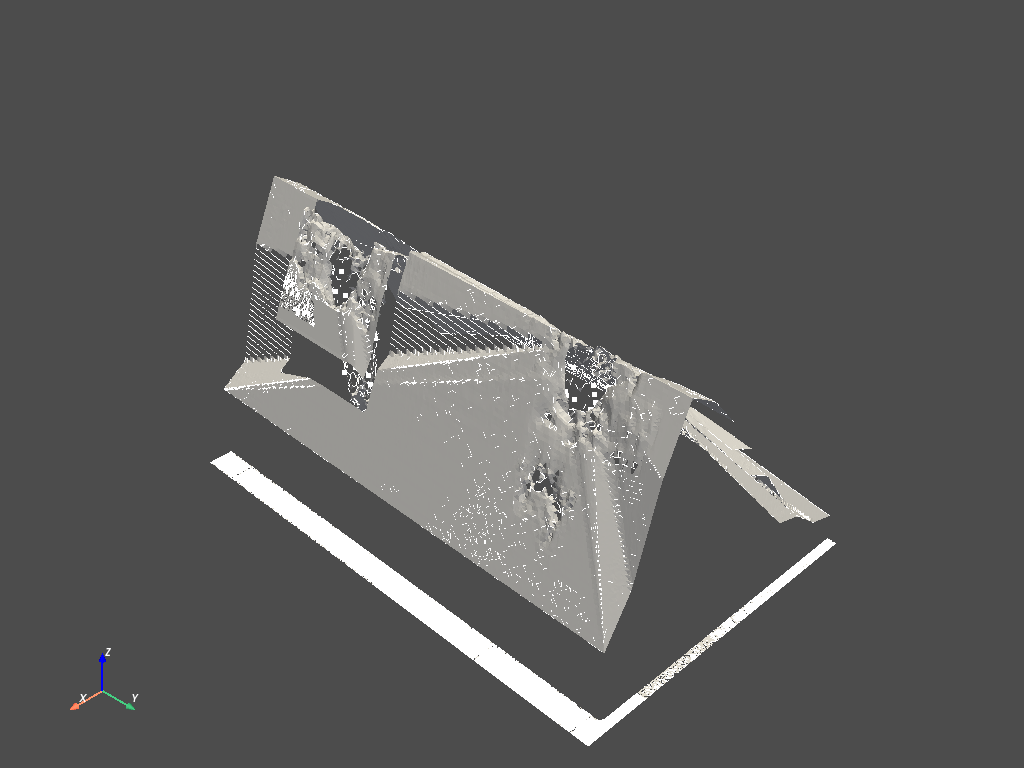

In [58]:
points = np.zeros((256*384,3))
points[:,0] = np.tile(np.arange(256),384)

for i in range(384):
    points[256*i:256*(i+1),1] = i

for i in range(384):
    for j in range(256):
        points[(i*256)+j,2] = thinning[j,i]

# no_traiangles = round((256*384)/3)
# stl = np.zeros(no_traiangles, dtype=mesh.Mesh.dtype)

# for i in range(no_traiangles):
#     stl["vectors"][i] = np.array([[points[i*3,1], points[i*3,0], points[i*3,2]],[points[i*3+1,0], points[i*3+1,1], points[i*3+1,2]],[points[i*3+2,0], points[i*3+2,1], points[i*3+2,2]]])

# stl = np.zeros(256*384, dtype=mesh.Mesh.dtype)
# stl["points"] = points

# mesh.Mesh(stl).save("temp/output.stl")

cloud = pv.PolyData(points)

volume = cloud.delaunay_3d(alpha=2)
shell = volume.extract_geometry()
shell.plot()

In [59]:
pv.PolyData.save(shell,"temp/output2.stl")

In [8]:
output = np.load("temp/output.npy")

points = np.zeros((256*384,3))
points[:,0] = np.tile(np.arange(256),384)

for i in range(384):
    points[256*i:256*(i+1),1] = i

for i in range(384):
    for j in range(256):
        points[(i*256)+j,2] = output[0][j,i]

cloud = pv.PolyData(points)

volume = cloud.delaunay_3d(alpha=2)
# shell = volume.extract_geometry()
# shell.plot()

In [76]:
input_stl = output_stl = mesh.Mesh.from_file("temp/input.stl")
output_stl.v0[:,2] = input_stl.v0[:,2]

(640, 3)